In [2]:
%env KEYWORD=Obesity

env: KEYWORD=Obesity


In [3]:
%env KEYWORD2=Cancer

env: KEYWORD2=Cancer


In [4]:
from peewee import *
from playhouse.db_url import connect

import os

In [5]:
KEYWORD = os.environ['KEYWORD']
KEYWORD2 = os.environ['KEYWORD2']

In [6]:
QUERY_STR = """SELECT
    date_trunc('month', date) m,
    COUNT (id)
FROM
    dataset
WHERE
    keyword = %s AND date >= '2018-01-01' AND date < '2022-02-01'
GROUP BY
    m
ORDER BY
    m;"""


DB_URL = os.environ.get('DATABASE')

db = connect(DB_URL)

In [7]:
class BaseModel(Model):
    class Meta:
        database = db

class Dataset(BaseModel):
    date = DateField()
    title = TextField()
    abstract = TextField()
    keyword = TextField()

In [8]:
query = Dataset.raw(QUERY_STR, KEYWORD)

COUNT_DICT = {}

for item in query:
    COUNT_DICT[item.m] = item.count

In [9]:
query2 = Dataset.raw(QUERY_STR, KEYWORD2)

COUNT_DICT_2 = {}

for item in query2:
    COUNT_DICT_2[item.m] = item.count

In [10]:
data1 = list(COUNT_DICT.values())
data2 = list(COUNT_DICT_2.values())

In [11]:
# Pearson's Correlation test
from scipy.stats import pearsonr

stat, p = pearsonr(data1, data2)
print('stat={}, p={}'.format(stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.9980352638387541, p=3.320657038041375e-58
Probably dependent


In [12]:
# Spearman's Rank Correlation Test
from scipy.stats import spearmanr

stat, p = spearmanr(data1, data2)
print('stat={}, p={}'.format(stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.9873714854033443, p=2.8854190729953487e-39
Probably dependent


In [13]:
# Kendall's  Correlation Test
from scipy.stats import kendalltau

stat, p = kendalltau(data1, data2)
print('stat={}, p={}'.format(stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.9255009676420104, p=7.198091687839787e-21
Probably dependent


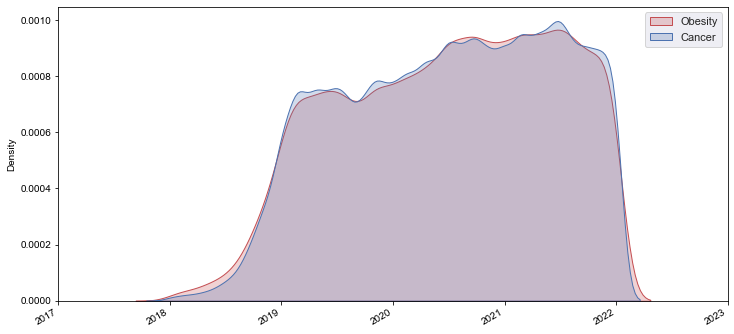

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

fig, ax = plt.subplots(figsize=(12, 6))
fig.autofmt_xdate()
ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2023, 1, 1)])

sns.set(style="darkgrid")

# convert the dictionary to a list
l_list_1 = [k for k, v in COUNT_DICT.items() for _ in range(v)]
l_list_2 = [k for k, v in COUNT_DICT_2.items() for _ in range(v)]

 
# plotting both distibutions on the same figure
fig = sns.kdeplot(l_list_1, shade=True, color="r", label=KEYWORD)
fig = sns.kdeplot(l_list_2, shade=True, color="b", label=KEYWORD2)
plt.legend()
plt.show()